In [1]:
import cv2
import numpy as np
import os
import h5py
import time
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
#from keras.optimizers import Adadelta
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
train_data_dir = 'input/train'
test_data_dir = 'input/val'

In [3]:
class_labels = os.listdir(train_data_dir)
print(class_labels)

['Black_footed_Albatross', 'Bobolink', 'Brewer_Blackbird', 'Cardinal', 'Crested_Auklet', 'Gray_Catbird', 'Groove_billed_Ani', 'Indigo_Bunting', 'Laysan_Albatross', 'Lazuli_Bunting', 'Least_Auklet', 'Painted_Bunting', 'Parakeet_Auklet', 'Red_winged_Blackbird', 'Rhinoceros_Auklet', 'Rusty_Blackbird', 'Sooty_Albatross', 'Spotted_Catbird', 'Yellow_breasted_Chat', 'Yellow_headed_Blackbird']


In [4]:
for wdir in os.listdir('input'):
    print(wdir)
    wdir_total = 0
    for label in class_labels:
        total = len(os.listdir(os.path.join('input', wdir, label)))
        print(label, total)
        wdir_total +=total
    print(wdir,'-----',wdir_total)

train
Black_footed_Albatross 345
Bobolink 320
Brewer_Blackbird 332
Cardinal 307
Crested_Auklet 336
Gray_Catbird 553
Groove_billed_Ani 336
Indigo_Bunting 313
Laysan_Albatross 332
Lazuli_Bunting 358
Least_Auklet 536
Painted_Bunting 369
Parakeet_Auklet 369
Red_winged_Blackbird 388
Rhinoceros_Auklet 356
Rusty_Blackbird 474
Sooty_Albatross 374
Spotted_Catbird 320
Yellow_breasted_Chat 336
Yellow_headed_Blackbird 313
train ----- 7367
val
Black_footed_Albatross 87
Bobolink 80
Brewer_Blackbird 84
Cardinal 77
Crested_Auklet 84
Gray_Catbird 139
Groove_billed_Ani 84
Indigo_Bunting 79
Laysan_Albatross 84
Lazuli_Bunting 90
Least_Auklet 135
Painted_Bunting 93
Parakeet_Auklet 93
Red_winged_Blackbird 98
Rhinoceros_Auklet 90
Rusty_Blackbird 119
Sooty_Albatross 94
Spotted_Catbird 80
Yellow_breasted_Chat 84
Yellow_headed_Blackbird 79
val ----- 1853


In [5]:
nb_train_samples =7367
nb_test_samples = 1853
num_classes = 20
img_rows= 64
img_cols= 64
channel = 3

In [6]:
def load_training_data():
    #Load training images
    labels = os.listdir(train_data_dir)
    print(labels)
    total = len(labels)
    
    X_train = np.ndarray((nb_train_samples, img_rows, img_cols, 3), dtype = np.uint8)
    Y_train = np.zeros((nb_train_samples,), dtype = np.uint8)
    
    i = 0
    print('-'*30)
    print('Creating training images...')
    print('-'*30)
    
    j = 0
    for label in labels:
        image_names_train = os.listdir(os.path.join(train_data_dir, label))
        total = len(image_names_train)
        print(label, total)
        for image_name in image_names_train:
            try:
                
                img = cv2.imread(os.path.join(train_data_dir, label, image_name), 1)
                img = np.array(cv2.resize(img, (img_rows,img_cols)))
                X_train[i] = img
                Y_train[i] = j
            except Exception as e:
                pass

            if i % 800 == 0:
                print('Done: {0}/{1} images'.format(i, total))
            i += 1
        j += 1    
    print(str(i) +"-------"+ str(j))                
    print('Loading done.')
    
    print('Transform targets to keras compatible format.')
    Y_train = np_utils.to_categorical(Y_train[:nb_train_samples], num_classes)

    return X_train, Y_train

In [7]:
def load_validation_data():
    # Load validation images
    labels = os.listdir(test_data_dir)
    

    X_test = np.ndarray((nb_test_samples, img_rows, img_cols, 3), dtype=np.uint8)
    Y_test = np.zeros((nb_test_samples,), dtype='uint8')

    i = 0
    print('-'*30)
    print('Creating validation images...')
    print('-'*30)
    j = 0
    for label in labels:
        image_names_test = os.listdir(os.path.join(test_data_dir, label))
        total = len(image_names_test)
        print(label, total)
        for image_name in image_names_test:
            try:
                img = cv2.imread(os.path.join(test_data_dir, label, image_name), 1)

                img = np.array(cv2.resize(img, (img_rows,img_cols)))

                X_test[i] = img
                Y_test[i] = j
            except Exception as e:
                
                pass

            if i % 200 == 0:
                print('Done: {0}/{1} images'.format(i, total))
            i += 1
        j += 1
    print(i)            
    print('Loading done.')
    
    print('Transform targets to keras compatible format.');
    Y_test = np_utils.to_categorical(Y_test[:nb_test_samples], num_classes)

    
    return X_test, Y_test

In [8]:
x_train, y_train = load_training_data()


['Black_footed_Albatross', 'Bobolink', 'Brewer_Blackbird', 'Cardinal', 'Crested_Auklet', 'Gray_Catbird', 'Groove_billed_Ani', 'Indigo_Bunting', 'Laysan_Albatross', 'Lazuli_Bunting', 'Least_Auklet', 'Painted_Bunting', 'Parakeet_Auklet', 'Red_winged_Blackbird', 'Rhinoceros_Auklet', 'Rusty_Blackbird', 'Sooty_Albatross', 'Spotted_Catbird', 'Yellow_breasted_Chat', 'Yellow_headed_Blackbird']
------------------------------
Creating training images...
------------------------------
Black_footed_Albatross 345
Done: 0/345 images
Bobolink 320
Brewer_Blackbird 332
Done: 800/332 images
Cardinal 307
Crested_Auklet 336
Done: 1600/336 images
Gray_Catbird 553
Groove_billed_Ani 336
Done: 2400/336 images
Indigo_Bunting 313
Laysan_Albatross 332
Lazuli_Bunting 358
Done: 3200/358 images
Least_Auklet 536
Done: 4000/536 images
Painted_Bunting 369
Parakeet_Auklet 369
Done: 4800/369 images
Red_winged_Blackbird 388
Rhinoceros_Auklet 356
Rusty_Blackbird 474
Done: 5600/474 images
Sooty_Albatross 374
Spotted_Catbir

In [9]:
x_test, y_test = load_validation_data()

------------------------------
Creating validation images...
------------------------------
Black_footed_Albatross 87
Done: 0/87 images
Bobolink 80
Brewer_Blackbird 84
Done: 200/84 images
Cardinal 77
Crested_Auklet 84
Done: 400/84 images
Gray_Catbird 139
Groove_billed_Ani 84
Done: 600/84 images
Indigo_Bunting 79
Laysan_Albatross 84
Lazuli_Bunting 90
Done: 800/90 images
Least_Auklet 135
Done: 1000/135 images
Painted_Bunting 93
Parakeet_Auklet 93
Done: 1200/93 images
Red_winged_Blackbird 98
Rhinoceros_Auklet 90
Rusty_Blackbird 119
Done: 1400/119 images
Sooty_Albatross 94
Done: 1600/94 images
Spotted_Catbird 80
Yellow_breasted_Chat 84
Yellow_headed_Blackbird 79
Done: 1800/79 images
1853
Loading done.
Transform targets to keras compatible format.


In [10]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(7367, 64, 64, 3) (7367, 20) (1853, 64, 64, 3) (1853, 20)


In [11]:
# normalize data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 127.5
x_test /= 127.5

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(32, (3, 3),activation='relu', padding='same', input_shape=(64,64,3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [14]:
model.compile(
    loss= 'categorical_crossentropy', 
    optimizer=Adam(lr=0.001, decay=1e-04),
    metrics=['accuracy']
)

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 14400)            

In [16]:
model.fit(
    x_train,
    y_train,
    batch_size=400,
    epochs=13,
    validation_data=(x_test, y_test),
    shuffle=True
)


Train on 7367 samples, validate on 1853 samples
Epoch 1/13
7367/7367 [==============================] - 57s 8ms/step - loss: 4.9337 - accuracy: 0.0647 - val_loss: 2.9252 - val_accuracy: 0.1565
Epoch 2/13
7367/7367 [==============================] - 52s 7ms/step - loss: 2.5520 - accuracy: 0.2460 - val_loss: 1.9753 - val_accuracy: 0.5213
Epoch 3/13
7367/7367 [==============================] - 55s 7ms/step - loss: 1.4931 - accuracy: 0.5783 - val_loss: 0.9294 - val_accuracy: 0.7760
Epoch 4/13
7367/7367 [==============================] - 57s 8ms/step - loss: 0.6940 - accuracy: 0.8109 - val_loss: 0.3490 - val_accuracy: 0.9352
Epoch 5/13
7367/7367 [==============================] - 57s 8ms/step - loss: 0.3280 - accuracy: 0.9129 - val_loss: 0.1874 - val_accuracy: 0.9682
Epoch 6/13
7367/7367 [==============================] - 57s 8ms/step - loss: 0.1968 - accuracy: 0.9513 - val_loss: 0.1447 - val_accuracy: 0.9854
Epoch 7/13
7367/7367 [==============================] - 58s 8ms/step - loss: 0.136

In [17]:
y_pred = model.predict(x_test, batch_size=10, verbose=0)

In [18]:
y_predict = []
for i in range(0, len(y_pred)):
    y_predict.append(int(np.argmax(y_pred[i])))
len(y_predict)

1853

In [19]:
y_true = []
for i in range(0, len(y_test)):
    y_true.append(int(np.argmax(y_test[i])))
len(y_true)

1853

In [28]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(15,15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [29]:
cm_plot_labels = class_labels

In [30]:
print(classification_report(y_true=y_true,y_pred=y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        80
           2       1.00      1.00      1.00        84
           3       1.00      1.00      1.00        77
           4       1.00      0.73      0.84        84
           5       1.00      1.00      1.00       139
           6       0.82      1.00      0.90        84
           7       1.00      1.00      1.00        79
           8       1.00      1.00      1.00        84
           9       1.00      1.00      1.00        90
          10       1.00      1.00      1.00       135
          11       1.00      1.00      1.00        93
          12       0.95      1.00      0.97        93
          13       1.00      1.00      1.00        98
          14       1.00      1.00      1.00        90
          15       1.00      1.00      1.00       119
          16       1.00      1.00      1.00        94
          17       1.00    

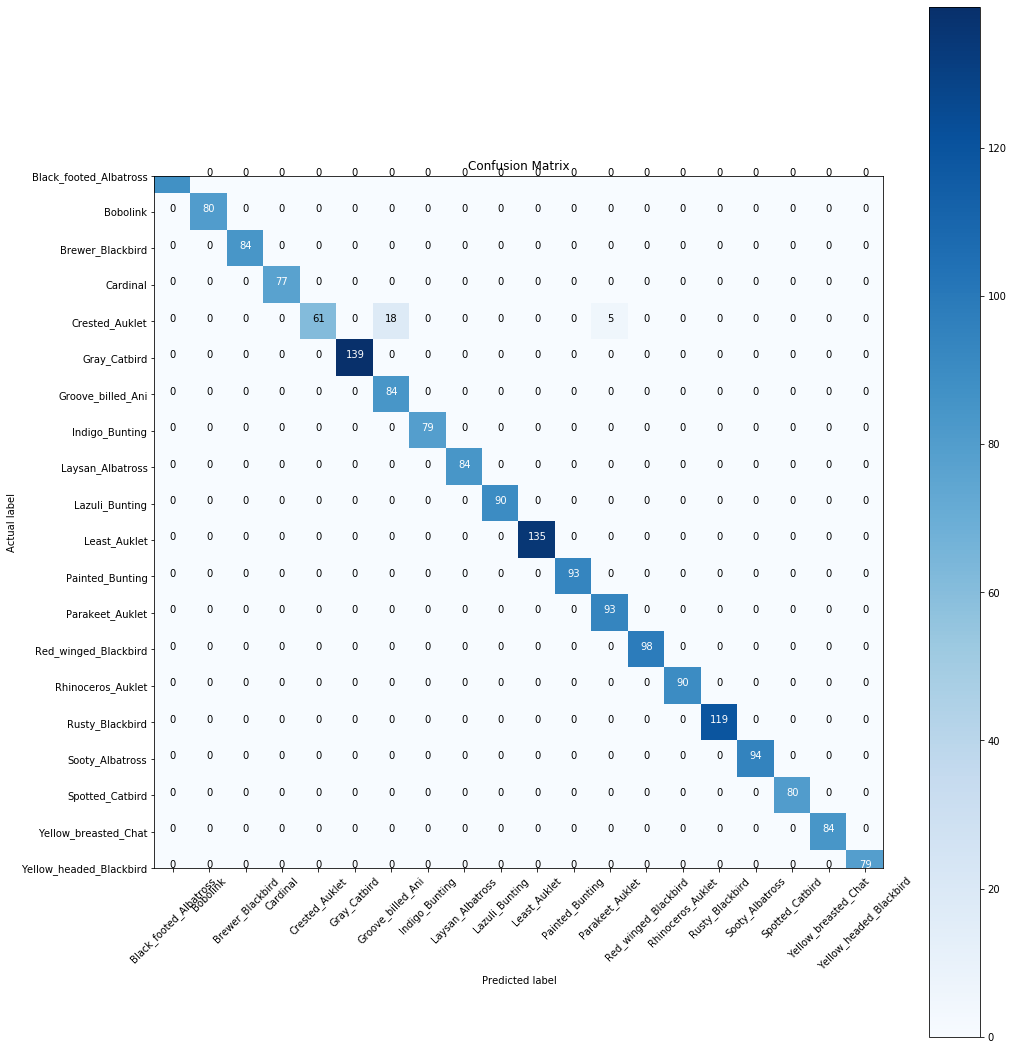

In [31]:
# to plot confusion matrix
cm = confusion_matrix(y_true=y_true, y_pred=y_predict)
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [32]:
score = model.evaluate(x= x_test, y= y_test, batch_size=32)
acc = score[1]
err = 1 - acc
print("Loss Value : ", score[0])
print("Accuracy : ", score[1])

1853/1853 [==============================] - 4s 2ms/step
Loss Value :  0.06445481390819201
Accuracy :  0.9875876903533936


In [33]:
model_structure = model.to_json()
f = Path("model/model_structure.json")
f.write_text(model_structure)

3337

In [34]:
model.save_weights("model/model_weights.h5")

# Thank You !